# Todays task 
* Preprocessing pipeline (tokenization, stopword removal)
* Labeled dataset and train/test sets
* Model training (Naive Bayes, LSTM, or BERT)
* Visualization of word clouds and confusion matrix

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pip install faker
from faker import Faker
import random
import warnings
warnings.filterwarnings("ignore")

# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# import re
# from nltk.stem.porter import PorterStemmer

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
fake = Faker()

reviews = [fake.text(max_nb_chars=200) for _ in range(5000)]

labels = [random.choice(['positive', 'neutral', 'negative']) for _ in range(5000)]

# Create a DataFrame
df = pd.DataFrame({
    'label': labels,
    "reviews": reviews
})

In [3]:
df.head()

,label,reviews
0,positive,Tough step this candidate true. Trade than sci...
1,neutral,Rather choose new necessary yeah. Almost popul...
2,negative,Expect road notice individual. Relationship tr...
3,neutral,Different involve hair natural. Hope lose mome...
4,positive,Door move tough relationship.\nTechnology bag ...


# Exploratory Data Analysis

In [4]:
df.shape

(5000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5000 non-null   object
 1   reviews  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


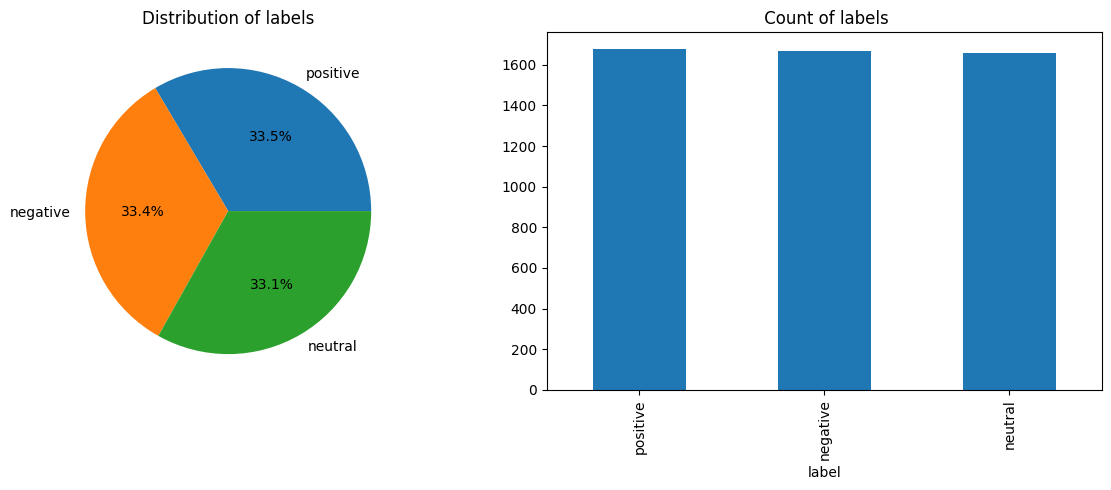

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df["label"].value_counts().plot(
	kind='pie',
	autopct='%1.1f%%',
	title='Distribution of labels',
	# colors=['green', '', 'red'],
	ax=axes[0]
)
axes[0].set_ylabel('')

df["label"].value_counts().plot(
	kind='bar',
	title=' Count of labels',
	# color=['green', 'blue', 'red'],
	ax=axes[1]
)

plt.tight_layout()
plt.show()

# Create Word clouds

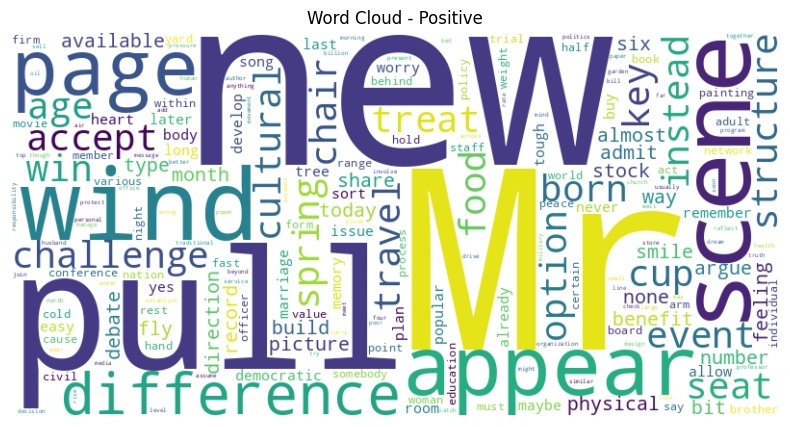

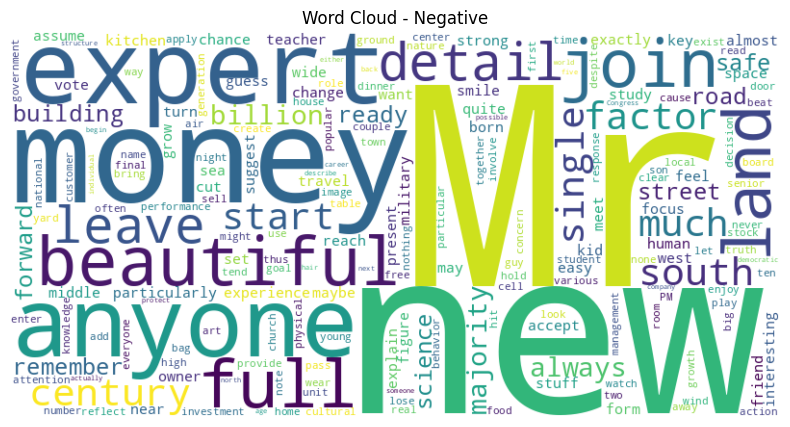

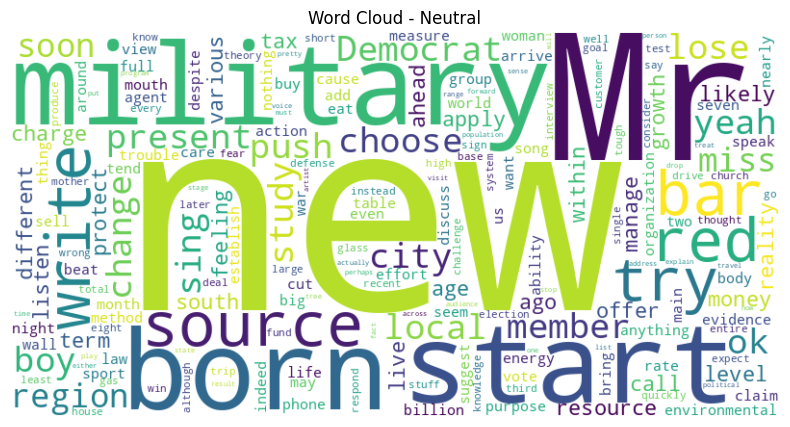

In [7]:
for sentiment in ["positive","negative", "neutral"]:
    text = " ".join(df[df["label"] == sentiment]["reviews"])
    wordCloud = WordCloud (width = 800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.title(f'Word Cloud - {sentiment.capitalize()}')
    plt.axis('off')
    plt.show()

In [8]:
def encode(label):
    if label == 'positive':
        return 1
    elif label == 'neutral':
        return 0
    else:
        return -1

df['label'] = df['label'].apply(encode)  

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # Fix: Download missing punkt_tab resource

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove punctuation and stopwords
    cleaned = [word for word in tokens if word not in string.punctuation and word not in stop_words]
    return " ".join(cleaned)

df['reviews'] = df['reviews'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Train - Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df["reviews"], df['label'], test_size=0.2, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score

model = Pipeline([
    ('vectorizer', CountVectorizer(
        max_features=5000,         
        ngram_range=(1,2),         
        stop_words='english'       
    )),
    ('classifier', MultinomialNB(
        alpha=0.5,                 
        fit_prior=True             
    )),
])

# Fit the model
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.32      0.32      0.32       345
           0       0.32      0.31      0.32       327
           1       0.31      0.33      0.32       328

    accuracy                           0.32      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.32      0.32      0.32      1000

0.319


In [12]:
%pip install keras-nlp

Note: you may need to restart the kernel to use updated packages.


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# from keras.preprocessing.text import Tokenizer
# from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Tokenization
tokenizer = Tokenizer(num_words=15000)
tokenizer.fit_on_texts(df['reviews'])
X = tokenizer.texts_to_sequences(df['reviews'])
max_tokens = max(len(x) for x in X)
X_padded = pad_sequences(X, maxlen=max_tokens)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(df['label'])
y_categorical = to_categorical(y_encoded)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)


2025-05-23 22:14:47.696241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748038487.988595      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748038488.077801      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# LSTM Model

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

embedding_size = 100
model = Sequential()
model.add(Embedding(input_dim=15000, output_dim=embedding_size, input_length=max_tokens))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=5e-4), metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=45, batch_size=64, validation_split=0.2, callbacks=[early_stop])

Epoch 1/45


2025-05-23 22:15:04.602738: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.3143 - loss: 1.0996 - val_accuracy: 0.3275 - val_loss: 1.0984
Epoch 2/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.3240 - loss: 1.0993 - val_accuracy: 0.3363 - val_loss: 1.0984
Epoch 3/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.3508 - loss: 1.0965 - val_accuracy: 0.3413 - val_loss: 1.0976
Epoch 4/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.4434 - loss: 1.0762 - val_accuracy: 0.3413 - val_loss: 1.1100
Epoch 5/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5000 - loss: 1.0097 - val_accuracy: 0.3512 - val_loss: 1.1388
Epoch 6/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5604 - loss: 0.9451 - val_accuracy: 0.3475 - val_loss: 1.1922
Epoch 7/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6364 - loss: 0.8579 - val_accuracy: 0.3338 - val_loss: 1.3136
Epoch 8/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.6609 - loss: 0.7790 - val_accuracy: 0.3275 - val_loss: 1

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (64, 32, 100)               │       1,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (64, 32, 128)               │          84,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (64, 32, 128)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (64, 64)                    │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (64, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (64, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (64, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (64, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,890,155 (18.65 MB)

 Trainable params: 1,630,051 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,260,104 (12.44 MB)

In [16]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# print(classification_report(y_true, y_pred, target_names=le.classes_))
class_names = [str(cls) for cls in le.classes_]
print(classification_report(y_true, y_pred, target_names=class_names))
print("Accuracy:", accuracy_score(y_true, y_pred))
# print("Accuracy:", accuracy_score(y_true, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step
              precision    recall  f1-score   support

          -1       0.32      0.21      0.26       345
           0       0.00      0.00      0.00       327
           1       0.32      0.75      0.45       328

    accuracy                           0.32      1000
   macro avg       0.21      0.32      0.24      1000
weighted avg       0.22      0.32      0.24      1000

Accuracy: 0.321


In [17]:
# !pip install -U transformers datasets --quiet

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import Dataset

In [19]:
# 4. Train/test split
train_texts, test_texts, train_labels, test_labels = train_test_split(df['reviews'], df['label'], test_size=0.2, random_state=42)

# Convert to Hugging Face datasets
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset = Dataset.from_dict({'text': test_texts.tolist(), 'label': test_labels.tolist()})


In [20]:
# 5. Tokenize
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(example):
    return tokenizer(example['text'], truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [21]:
# 6. Load BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
# 7. Metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    precision, recall, f1, _ = classification_report(labels, preds, output_dict=True, zero_division=0)['weighted avg'].values()
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}


In [23]:
# 8. TrainingArguments and Trainer setup
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",  # use this instead of evaluation_strategy
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    save_strategy="epoch",
    load_best_model_at_end=True,
    logging_steps=50,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [24]:
# 9. Train the model
# trainer.train()

In [25]:
# 10. Evaluate on test set
# predictions = trainer.predict(test_dataset)
# preds = np.argmax(predictions.predictions, axis=-1)
# labels = predictions.label_ids

# # Accuracy
# acc = accuracy_score(labels, preds)
# print("Accuracy:", acc)

# # Classification report
# print(classification_report(labels, preds, target_names=["negative", "neutral", "positive"]))

In [26]:
# 11. Confusion Matrix
# cm = confusion_matrix(labels, preds)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["negative", "neutral", "positive"], yticklabels=["negative", "neutral", "positive"])
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()
